In [86]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import numpy as np

In [87]:
rx_10 = np.pi/4
rx_11 = np.pi/3

rx_20 = np.pi/6
rx_21 = np.pi/4

In [88]:
# Define two quantum circuits
qc1 = QuantumCircuit(2)

# Prepare an initial state using a single-qubit rotation
qc1.rx(rx_11, 0) # Rotate the first qubit around the x-axis by a given angle
qc1.rx(rx_11, 1) # Rotate the second qubit around the x-axis by a given angle
qc1.h(0) # Apply Hadamard gate on the first qubit
qc1.x(1) # Apply Pauli-X gate on the second qubit
qc1.cnot(0, 1) # Add a CNOT gate to create entanglement

qc2 = QuantumCircuit(2)

# Prepare an initial state using a single-qubit rotation
qc2.rx(rx_20, 0) # Rotate the first qubit around the x-axis by a given angle
qc2.rx(rx_21, 1) # Rotate the second qubit around the x-axis by a given angle
qc2.h(0) # Apply Hadamard gate on the first qubit
qc2.x(1) # Apply Pauli-X gate on the second qubit
qc2.cnot(0, 1) # Add a CNOT gate to create entanglement

# Convert the quantum circuits to gates
my_gate1 = qc1.to_gate()
my_gate2 = qc2.to_gate().inverse() # Apply inverse

# Create a new circuit and append the gates
new_circuit = QuantumCircuit(2)
new_circuit.append(my_gate1, [0, 1])
new_circuit.append(my_gate2, [0, 1])

# Display the new circuit
print(new_circuit)

     ┌──────────────┐┌─────────────────┐
q_0: ┤0             ├┤0                ├
     │  circuit-366 ││  circuit-367_dg │
q_1: ┤1             ├┤1                ├
     └──────────────┘└─────────────────┘


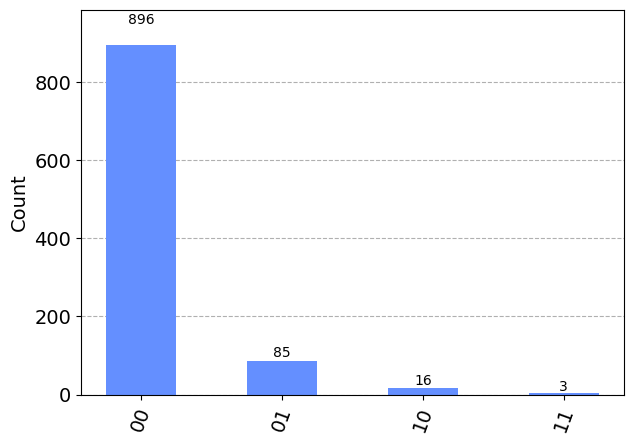

In [89]:
# Add a measurement to the new circuit
new_circuit.measure_all()

# Simulate the final state
simulator = Aer.get_backend('qasm_simulator')
job = execute(new_circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(new_circuit)

# Plot a histogram of the final state
plot_histogram(counts)